In [1]:
pip install numpy==1.21.0

     --------------------------------------- 14.0/14.0 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-fb1711452d4d8cee9f276fd1449ee5c7.dll'
Consider using the `--user` option or check the permissions.



In [2]:
pip install tensorflow==2.10.0

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-27,28.322254,28.322254,27.570318,27.846561,27.814909,261756
1,2014-03-28,27.985680,28.243971,27.857033,27.922852,27.891113,822311
2,2014-03-31,28.266907,28.272392,27.770269,27.772264,27.740696,216031
3,2014-04-01,27.859026,28.344692,27.859026,28.280371,28.248226,159075
4,2014-04-02,28.958508,30.158714,28.032551,28.272392,28.240255,2941993
...,...,...,...,...,...,...,...
2196,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452939
2197,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298756
2198,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485507
2199,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020537


In [6]:
ma_100_days = data.Close.rolling(100).mean()

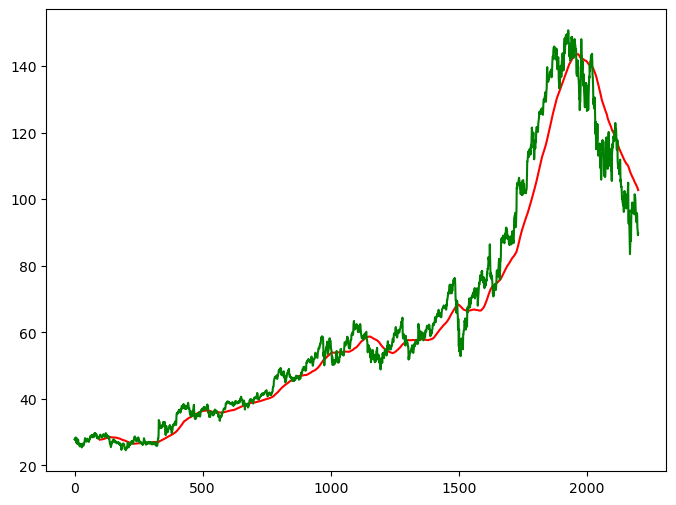

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

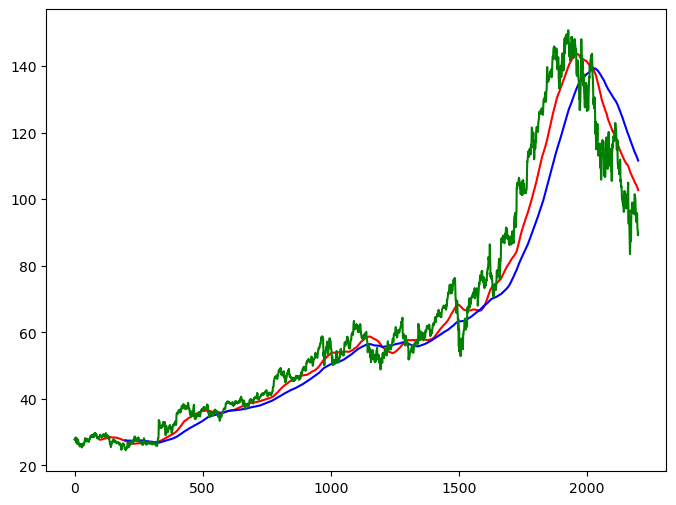

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

1760

In [14]:

data_test.shape[0]

441

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
52/52 [==============================] - 41s 558ms/step - loss: 0.0395
Epoch 2/50
52/52 [==============================] - 29s 560ms/step - loss: 0.0063
Epoch 3/50
52/52 [==============================] - 29s 559ms/step - loss: 0.0054
Epoch 4/50
52/52 [==============================] - 28s 540ms/step - loss: 0.0054
Epoch 5/50
52/52 [==============================] - 29s 550ms/step - loss: 0.0058
Epoch 6/50
52/52 [==============================] - 29s 552ms/step - loss: 0.0051
Epoch 7/50
52/52 [==============================] - 29s 561ms/step - loss: 0.0050
Epoch 8/50
52/52 [==============================] - 29s 551ms/step - loss: 0.0045
Epoch 9/50
52/52 [==============================] - 25s 475ms/step - loss: 0.0041
Epoch 10/50
52/52 [==============================] - 26s 509ms/step - loss: 0.0042
Epoch 11/50
52/52 [==============================] - 27s 525ms/step - loss: 0.0042
Epoch 12/50
52/52 [==============================] - 27s 515ms/step - loss: 0.0033
Epoch 13/50
5

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:

data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

14/14 [==============================] - 4s 155ms/step


In [29]:
scale =1/scaler.scale_

In [30]:
y = y*scale

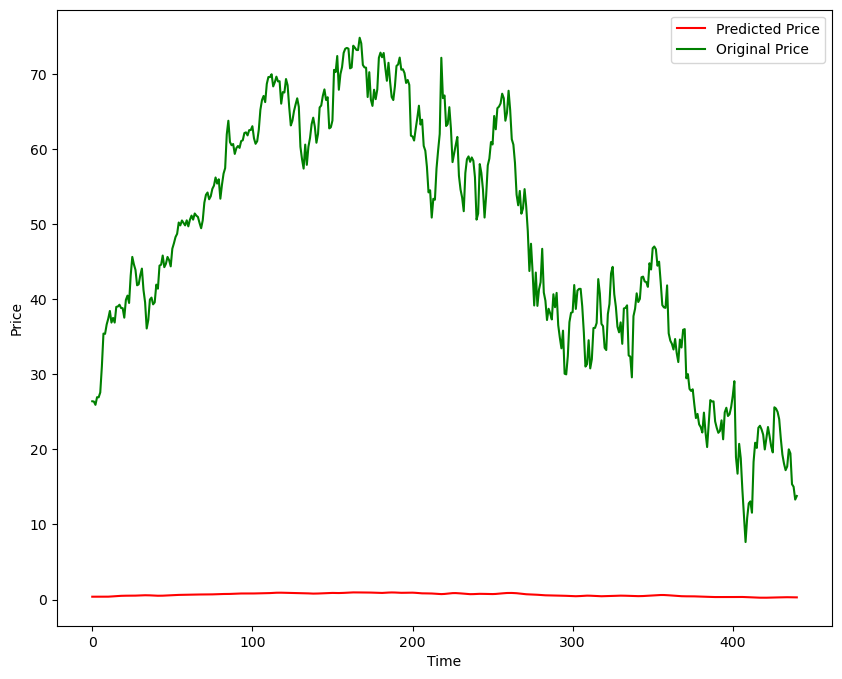

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')